#Nick Staich

Project 1 - Final (Core)
This week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

1) Your first task is to build a linear regression model to predict sales.

Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.
2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.
Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse.  
3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?
Justify your recommendation.
4) To finalize this project, you need to prepare an executive (non-technical) presentation about your project.

Create a slide deck for a non-technical audience presenting this data, your analysis, and model recommendations.
Do not include data cleaning, pre-processing, or exploration steps in your presentation.
Do include 2 insights from your analysis supported with appropriate "reporting" quality visuals.
Prepare a short (5 minute) audio presentation using your slides (Google Slides, PowePoint, etc). 
Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.  Your presentation requires audio, but video is optional.
Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. Think of this as an executive summary or an overview of your project.
Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.
Commit all of your work to GitHub and turn in a link to your GitHub repo with your final project. Make sure you include your presentation slides and recording on your GitHub repo as well.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

filename = r'Data\sales_predictions.csv'

df = pd.read_csv(filename)
df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Quick Function for EDA analysis (proper EDA should still be conducted)

def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
        'dtype':df.dtypes,
        '# null': df.isna().sum(),
        'null %': df.isna().sum()/len(df)*100,
        'nunique': df.nunique(),
        'min':df.min(),
        'max':df.max()        
    })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

C:\Users\staichn\AppData\Local\Temp\ipykernel_26404\1971790721.py:10: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'min':df.min(),
C:\Users\staichn\AppData\Local\Temp\ipykernel_26404\1971790721.py:11: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null %,nunique,min,max
0,Item_Fat_Content,object,0,0.000000,5,LF,reg
1,Item_Identifier,object,0,0.000000,1559,DRA12,NCZ54
2,Item_MRP,float64,0,0.000000,5938,31.29,266.8884
3,Item_Outlet_Sales,float64,0,0.000000,3493,33.29,13086.9648
4,Item_Type,object,0,0.000000,16,Baking Goods,Starchy Foods
5,Item_Visibility,float64,0,0.000000,7880,0.0,0.328391
6,Item_Weight,float64,1463,17.165317,415,4.555,21.35
7,Outlet_Establishment_Year,int64,0,0.000000,9,1985,2009
8,Outlet_Identifier,object,0,0.000000,10,OUT010,OUT049
9,Outlet_Location_Type,object,0,0.000000,3,Tier 1,Tier 3


In [4]:
#Plotting Customization Options
plt.style.use(('classic','dark_background'))
sns.set_context(context='notebook', font_scale=1.2)
plt.rcParams['savefig.transparent']=False
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['figure.facecolor']='black'

Text(0.5, 1.0, 'Distribution of Item Outlet Sales')

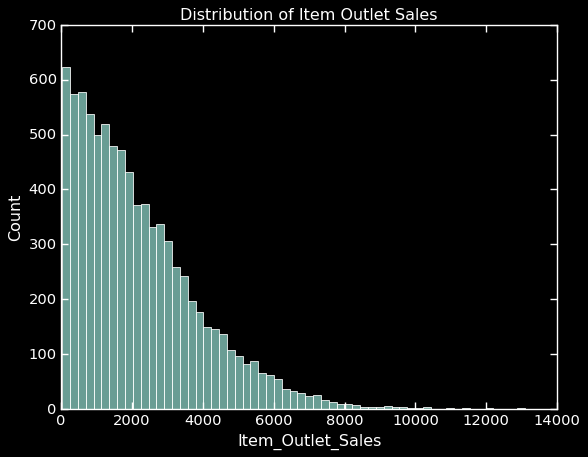

In [5]:
ax = sns.histplot(data=df, x='Item_Outlet_Sales');
ax.set_title("Distribution of Item Outlet Sales")

In [6]:
import sklearn
print (f"sklearn version: {sklearn.__version__}")
!python --version

sklearn version: 1.1.3
Python 3.9.15


In [7]:
#Our Standard imports
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
#Models and evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
#Set random state for reproducibility
SEED = 321 
np.random.seed(SEED)
#set pandas to display more columns
pd.set_option('display.max_columns',50)

In [11]:

#X_test_freqs = X_test['Item_Identifier'].value_counts(normalize=True)

#X_test_freqs

#X_test_items = X['Item_Identifier']

In [12]:
# Make x and y variables
y = df['Item_Outlet_Sales'].copy()
X = df.drop(columns=['Item_Outlet_Sales']).copy()

#stratify=X_test_items, 
# Train-Test-Split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8269           FDI60        7.220          Regular         0.064142   
7604           DRD25        6.135               LF         0.079294   
2762           NCP18       12.150          Low Fat         0.028593   
6464           NCS30        5.945               LF         0.093009   
4707           FDI08       18.200          Regular         0.066285   
...              ...          ...              ...              ...   
3482           FDL44          NaN          Low Fat         0.012216   
8360           FDA34       11.500          Low Fat         0.014884   
5929           NCU30        5.110          Low Fat         0.034945   
4220           FDX47        6.550          Regular         0.034800   
6682           DRG49        7.810          Low Fat         0.067730   

                  Item_Type  Item_MRP Outlet_Identifier  \
8269           Baking Goods   61.2510            OUT010   

In [13]:
# Make categorical se;lector and verify it works

cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:

#X_test_freqs = X_test['Item_Identifier'].value_counts(normalize=True)

#X_test_freqs

#X_test_items = X['Item_Identifier']

In [16]:
#sns.histplot(X_test_freqs)

In [17]:
#Make numeric selector and verify it works

num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [18]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown = 'ignore', min_frequency=.0020, sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

In [19]:

preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe, cat_sel),
                                      verbose_feature_names_out=False)

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000023074F55730>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=0.002,
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000230741D4D60>)],
                  verbose_feature_names_out=False)

In [20]:
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_infrequent_sklearn',
       'Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       

In [21]:
#Create a preprocessed Dataframe for our training set using the pulled out feature names and original X_train

X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                         columns = feature_names, index = X_train.index)
X_train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_infrequent_sklearn,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,7.220,0.064142,61.2510,1998.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,6.135,0.079294,111.2860,2009.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,12.150,0.028593,151.0708,2004.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,5.945,0.093009,127.8652,2004.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,18.200,0.066285,247.2092,2004.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Create the pre-processed DataFrame for the test set.

X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                        columns = feature_names, index = X_test.index)
X_test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_infrequent_sklearn,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8077,15.250000,0.061531,132.2968,2007.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2391,17.850000,0.044463,127.1020,1997.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
163,7.270000,0.071078,114.2518,1997.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4608,12.822634,0.075142,145.8444,1985.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5544,13.500000,0.121633,161.6920,1998.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [23]:
# Confirm the head of y_test still matches up with X_test_df

y_test.head()

8077    1696.4584
2391    2024.0320
163     2618.5914
4608    3773.7544
5544     159.7920
Name: Item_Outlet_Sales, dtype: float64

In [24]:
# Create a custom function for regression evaluation

def evaluate_regression(model, X_train, y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    # Training data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                           squared=False)
    
    print(f"Training Data:\tR^2 = {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
    
    # Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                          squared=False)
    
    print(f"Test Data: \tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [25]:
# Run a regression model and check that the evaluation function runs correctly

lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2 = 0.56	RMSE= 1114.87
Test Data: 	R^2= 0.56	RMSE= 1164.39


In [32]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [33]:
coeffs = get_coeffs_linreg(lin_reg)
coeffs

Outlet_Type_Grocery Store            -1.089558e+03
Outlet_Identifier_OUT010             -6.200715e+02
Outlet_Identifier_OUT019             -4.694860e+02
Item_Visibility                      -2.798400e+02
Outlet_Identifier_OUT045             -2.066023e+02
Outlet_Location_Type_Tier 1          -1.409973e+02
Item_Type_Soft Drinks                -1.171952e+02
Outlet_Size_High                     -8.349956e+01
Outlet_Identifier_OUT013             -8.349956e+01
Item_Fat_Content_reg                 -7.627139e+01
Item_Type_Household                  -6.867316e+01
Item_Type_Dairy                      -4.939516e+01
Outlet_Size_Small                    -4.580712e+01
Item_Type_Health and Hygiene         -4.137776e+01
Item_Fat_Content_LF                  -2.789757e+01
Outlet_Establishment_Year            -1.848263e+01
Item_Type_Meat                       -1.568124e+01
Item_Type_Snack Foods                -1.148237e+01
Item_Type_Breads                     -6.188674e+00
Item_Type_Frozen Foods         

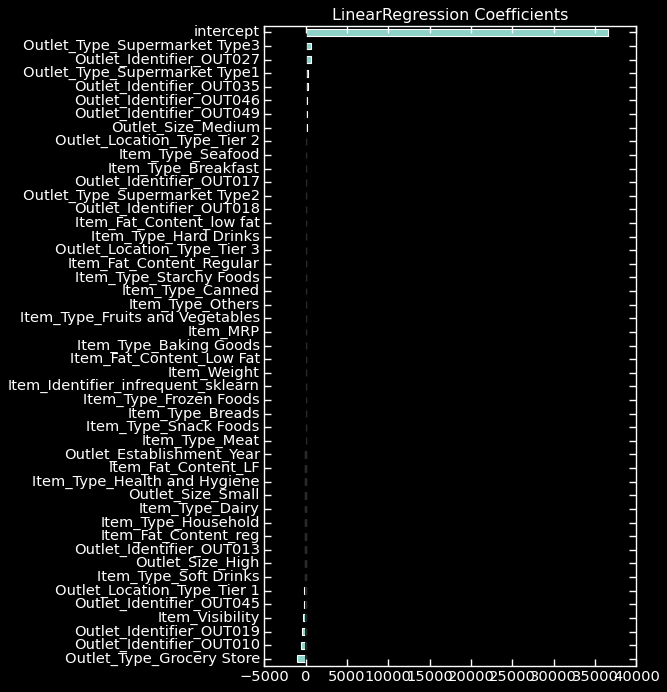

In [35]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');

In [36]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

intercept                             47.0
Outlet_Type_Grocery Store             46.0
Outlet_Type_Supermarket Type3         44.5
Outlet_Identifier_OUT027              44.5
Outlet_Identifier_OUT010              43.0
Outlet_Identifier_OUT019              42.0
Outlet_Type_Supermarket Type1         41.0
Item_Visibility                       40.0
Outlet_Identifier_OUT035              39.0
Outlet_Identifier_OUT045              38.0
Outlet_Identifier_OUT046              37.0
Outlet_Location_Type_Tier 1           36.0
Outlet_Identifier_OUT049              35.0
Outlet_Size_Medium                    34.0
Item_Type_Soft Drinks                 33.0
Outlet_Location_Type_Tier 2           32.0
Item_Type_Seafood                     31.0
Outlet_Size_High                      30.0
Outlet_Identifier_OUT013              29.0
Item_Fat_Content_reg                  28.0
Item_Type_Household                   27.0
Item_Type_Breakfast                   26.0
Outlet_Identifier_OUT017              25.0
Outlet_Type

In [37]:
top_n_features = coeff_rank.head(10)
top_n_features

intercept                        47.0
Outlet_Type_Grocery Store        46.0
Outlet_Type_Supermarket Type3    44.5
Outlet_Identifier_OUT027         44.5
Outlet_Identifier_OUT010         43.0
Outlet_Identifier_OUT019         42.0
Outlet_Type_Supermarket Type1    41.0
Item_Visibility                  40.0
Outlet_Identifier_OUT035         39.0
Outlet_Identifier_OUT045         38.0
dtype: float64

In [38]:
## Slicing out the top_n_features names to visualize
plot_vals = coeffs.loc[top_n_features.index]
plot_vals

intercept                        36622.534908
Outlet_Type_Grocery Store        -1089.557516
Outlet_Type_Supermarket Type3      683.965064
Outlet_Identifier_OUT027           683.965064
Outlet_Identifier_OUT010          -620.071505
Outlet_Identifier_OUT019          -469.486011
Outlet_Type_Supermarket Type1      342.051428
Item_Visibility                   -279.839968
Outlet_Identifier_OUT035           235.404518
Outlet_Identifier_OUT045          -206.602299
dtype: float64

In [39]:
top_n = 15
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

Outlet_Type_Grocery Store        -1089.557516
Outlet_Identifier_OUT010          -620.071505
Outlet_Identifier_OUT019          -469.486011
Item_Visibility                   -279.839968
Outlet_Identifier_OUT045          -206.602299
Outlet_Location_Type_Tier 1       -140.997330
Item_Type_Soft Drinks             -117.195239
Outlet_Size_Medium                 129.306681
Outlet_Identifier_OUT049           140.214310
Outlet_Identifier_OUT046           188.274371
Outlet_Identifier_OUT035           235.404518
Outlet_Type_Supermarket Type1      342.051428
Outlet_Type_Supermarket Type3      683.965064
Outlet_Identifier_OUT027           683.965064
intercept                        36622.534908
dtype: float64

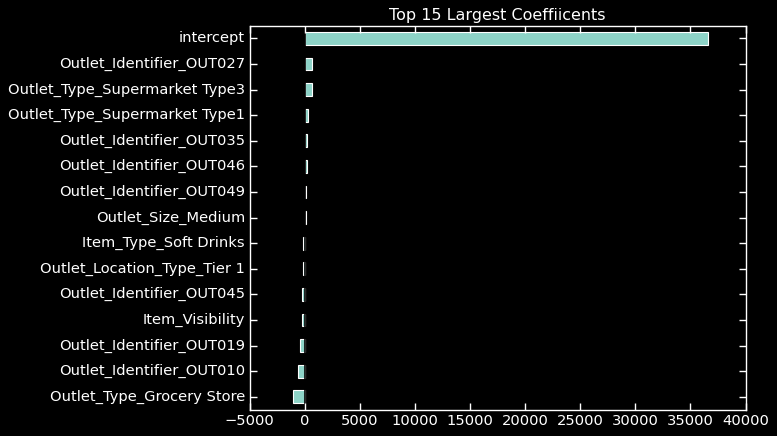

In [40]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');

In [48]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
        
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    ## return ax in case want to continue to update/modify figure
    return ax

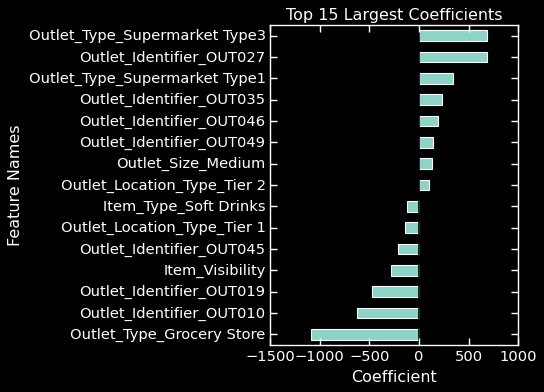

In [49]:
## Testing our function with intercept=False (the default)
ax= plot_coeffs(coeffs,top_n=15)

In [46]:
def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

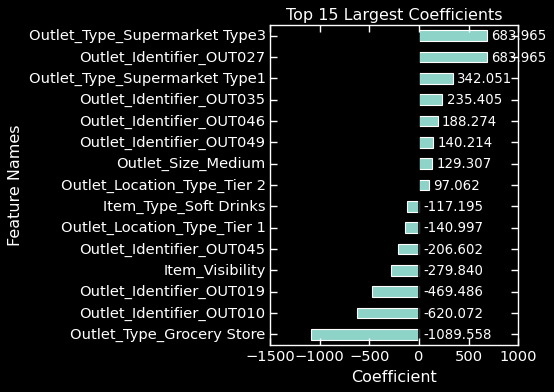

In [47]:
ax = plot_coeffs(coeffs,top_n=15)
annotate_hbars(ax)

# Regression Tree Model
2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model. Compare the performance of your model based on r^2. Compare the performance of your model based on rmse.

In [ ]:
#Build an instance of your model
bagreg = BaggingRegressor(n_estimators = 100, random_state = 42)

# Look at the hyperparameters
bagreg.get_params()

In [ ]:
bagreg.fit(X_train_processed, y_train)

In [ ]:
bagreg.fit(X_train_processed, y_train)

In [ ]:
bagreg.predict(X_test_processed)

In [ ]:
# Stgep 5: Evaluate the model performance:

bagreg_train_score = bagreg.score(X_train_processed, y_train)
bagreg_test_score = bagreg.score(X_test_processed, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

#  check the R^2 score for the training set:
train_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)
print(train_score)
print(test_score) 

bagreg_r2_train = r2_score(y_train, train_preds)
bagreg_r2_test = r2_score(y_test, test_preds)
print(bagreg_r2_train)
print(bagreg_r2_test)

bagreg_mae_train = mean_absolute_error(y_train, train_preds)
bagreg_mae_test = mean_absolute_error(y_test, test_preds)
print(bagreg_mae_train)
print(bagreg_mae_test)

bagreg_mse_train = mean_squared_error(y_train, train_preds)
bagreg_mse_test = mean_squared_error(y_test, test_preds)
print(bagreg_mse_train)
print(bagreg_mse_test)

bagreg_rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
bagreg_rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

Run 1:

0.9278218979158627

0.5373746660067594

Needs serious tuning.

Run 2 (Parameter Adjust: n_estimaors = 50)

0.9354451124061893

0.5465621330506721

Run 2 (Parameter Adjust: n_estimaors = 100)

0.9377775831517625

0.5502263582728071

#  Random Forest

In [ ]:
#Inatantiate your model
rf = RandomForestRegressor(max_depth = 150, n_estimators = 100, random_state = 42)

In [ ]:
# Check for tunable parameters

rf.get_params()

In [ ]:
# Fit your model

rf.fit(X_train_processed, y_train)

In [ ]:
rf.predict(X_test_processed)

In [ ]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

# Evaluate the model performance:

rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

rf_r2_train = r2_score(y_train, train_preds)
rf_r2_test = r2_score(y_test, test_preds)
print(rf_r2_train)
print(rf_r2_test)

rf_mae_train = mean_absolute_error(y_train, train_preds)
rf_mae_test = mean_absolute_error(y_test, test_preds)
print(rf_mae_train)
print(rf_mae_test)

rf_mse_train = mean_squared_error(y_train, train_preds)
rf_mse_test = mean_squared_error(y_test, test_preds)
print(rf_mse_train)
print(rf_mse_test)

rf_rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rf_rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

Executive summary:

Looked into all available data features for those impactful via a high correlation, and reoved the others.
